# PG AI ML - June Co hort
## Harry Arce
### PG AI - Deep Learning with Tensorflow and Keras

Project 1: Lending Club Loan Data Analysis


In [758]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [759]:
df = pd.read_csv("./loan_data.csv") 

In [760]:
df.shape

(9578, 14)

In [761]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [762]:
df.tail()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1
9577,0,debt_consolidation,0.1392,853.43,11.264464,16.28,732,4740.000000,37879,57.0,6,0,0,1


In [763]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [764]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000e+00
int.rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log.annual.inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9578.0,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol.bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol.util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inq.last.6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01


In [765]:
# variables with unique values
for col in df:
    print(col, df[col].unique())

credit.policy [1 0]
purpose ['debt_consolidation' 'credit_card' 'all_other' 'home_improvement'
 'small_business' 'major_purchase' 'educational']
int.rate [0.1189 0.1071 0.1357 0.1008 0.1426 0.0788 0.1496 0.1114 0.1134 0.1221
 0.1347 0.1324 0.0859 0.0714 0.0863 0.1103 0.1317 0.0894 0.1039 0.1513
 0.08   0.1355 0.1229 0.0901 0.0743 0.1375 0.0807 0.1028 0.087  0.1122
 0.0996 0.0933 0.0838 0.0775 0.1059 0.1596 0.1154 0.1343 0.1249 0.0964
 0.1186 0.1501 0.128  0.1091 0.1217 0.1533 0.0712 0.1438 0.1565 0.1467
 0.1312 0.147  0.1407 0.1014 0.1046 0.133  0.0983 0.1393 0.092  0.1236
 0.1362 0.1078 0.1583 0.1109 0.1141 0.1267 0.1204 0.0951 0.1172 0.1299
 0.1488 0.152  0.1425 0.1836 0.1615 0.06   0.0832 0.1261 0.0945 0.1197
 0.1387 0.0976 0.1292 0.0737 0.0768 0.1166 0.1418 0.1545 0.1482 0.1703
 0.145  0.1671 0.1576 0.1608 0.164  0.1734 0.1051 0.157  0.1222 0.1273
 0.1379 0.1253 0.1128 0.1286 0.1287 0.097  0.1001 0.1538 0.1191 0.1254
 0.1159 0.138  0.1096 0.1064 0.1349 0.1033 0.1475 0.1601 0.1507 0

In [766]:
df.isna().any()

credit.policy        False
purpose              False
int.rate             False
installment          False
log.annual.inc       False
dti                  False
fico                 False
days.with.cr.line    False
revol.bal            False
revol.util           False
inq.last.6mths       False
delinq.2yrs          False
pub.rec              False
not.fully.paid       False
dtype: bool

## Feature Transformation

Transform categorical values into numerical values (discrete)

In [767]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

#le.fit(df['purpose'])
#df['purpose'] = le.transform(df['purpose'])
#ca_labels = dict(zip(le.classes_, le.transform(le.classes_)))
#print(ca_labels)


df = pd.get_dummies(df,columns=['purpose'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_all_other           9578 

In [768]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_all_other           9578 

In [769]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='not.fully.paid', ylabel='count'>

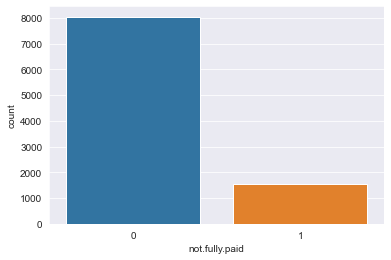

In [770]:

sns.set_style('darkgrid')
sns.countplot(x='not.fully.paid', data=df)

<AxesSubplot:>

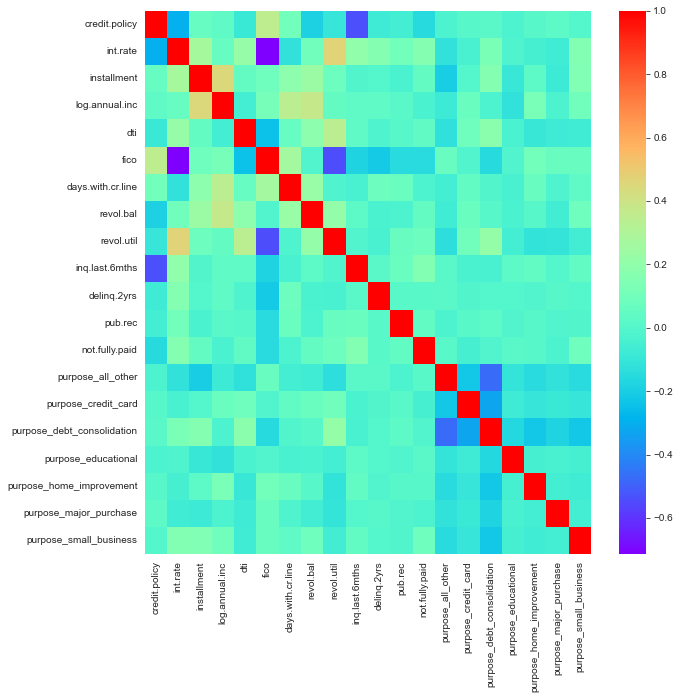

In [771]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap='rainbow')

credit policy - inq.last.6mnths
iint.rate - fico
revol.util - fico

c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


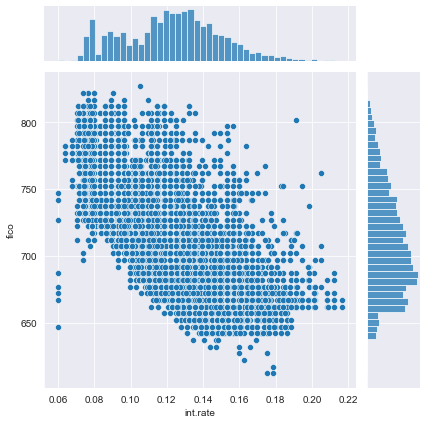

In [772]:
sns.jointplot('int.rate','fico',data=df)

<Figure size 720x360 with 0 Axes>

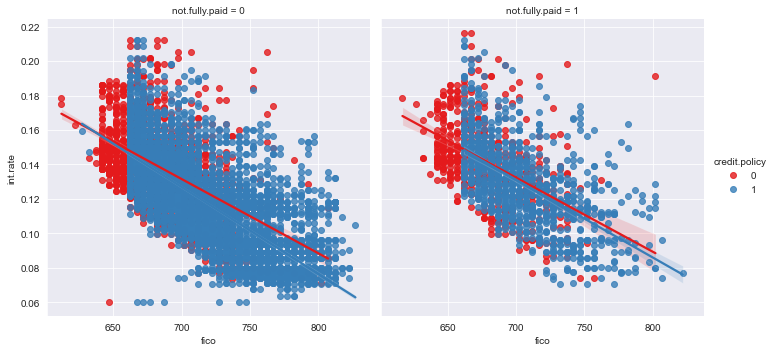

In [773]:
plt.figure(figsize=(10,5))
sns.lmplot(y='int.rate',x='fico',data=df,hue='credit.policy',
           col='not.fully.paid',palette='Set1')

c:\Users\harceroj\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


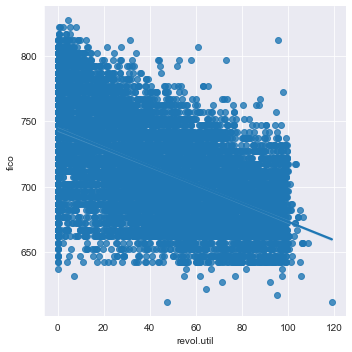

In [774]:
sns.lmplot('revol.util','fico',data=df, fit_reg=True)

In [775]:
df = df.drop('int.rate',axis=1)
df = df.drop('revol.util',axis=1)

In [779]:
# Split data X, y
X = df.drop("not.fully.paid", axis = 1)
print(X.shape)
y = df["not.fully.paid"]
print(y.shape)

(9578, 17)
(9578,)


In [780]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=157)


In [781]:
X_train, X_test, y_train, y_test

(      credit.policy  installment  log.annual.inc    dti  fico  \
 6257              1       139.17        9.287301   0.00   747   
 9080              0       135.09        9.852194  24.25   682   
 5885              1       266.40       10.714418   0.80   747   
 8199              0       208.59       10.316921  19.96   642   
 5932              1       426.45       11.775290  12.15   747   
 ...             ...          ...             ...    ...   ...   
 5186              1       866.13       10.878047  13.00   707   
 5919              1       278.17       11.104957  14.29   767   
 994               1        76.36       11.002100  24.94   732   
 6707              1       196.83       11.082143   0.52   782   
 2728              1       159.74       10.126631   3.89   777   
 
       days.with.cr.line  revol.bal  inq.last.6mths  delinq.2yrs  pub.rec  \
 6257        2970.041667          0               2            0        0   
 9080        1680.000000      15360               4 

In [782]:
X_train.shape, y_test.shape

((6704, 17), (2874,))

In [783]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape , X_test.shape)

(6704, 17) (2874, 17)


In [784]:
print(X_train.shape)
print(X_test.shape)

(6704, 17)
(2874, 17)


In [750]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95) 

In [751]:
pca.fit(X_train)
X_pca = pca.transform(X_train)
print(X_train.shape)
print(X_pca.shape)

(6704, 19)
(6704, 11)


In [752]:
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from mlxtend.feature_extraction import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_discriminants=11)
lda.fit(X_train, y_train)
X_train_lda = lda.transform(X_train)

X_test_lda = lda.transform(X_test)

In [787]:
print(X_train.shape)
print(X_train_lda.shape)

print(X_test.shape)
print(X_test_lda.shape)

(6704, 17)
(6704, 11)
(2874, 17)
(2874, 11)


In [786]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam

In [799]:
model = Sequential()

model.add(Dense(17, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(10, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(5, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(
        optimizer=Adam(learning_rate = 0.01),#'adam', 
        loss='binary_crossentropy', 
        metrics=['accuracy']
)

early_stop = EarlyStopping(
        monitor='val_loss', 
        mode='min', 
        verbose=1, 
        patience=15
)

model.fit(X_train, y_train, 
        epochs=500, 
        batch_size=256, 
        validation_data=(X_test, y_test),
        callbacks=[early_stop]
)

Epoch 1/500
27/27 [==============================] - 4s 30ms/step - loss: 0.6847 - accuracy: 0.6338 - val_loss: 0.4978 - val_accuracy: 0.8361
Epoch 2/500
27/27 [==============================] - 0s 9ms/step - loss: 0.4825 - accuracy: 0.8280 - val_loss: 0.4447 - val_accuracy: 0.8361
Epoch 3/500
27/27 [==============================] - 0s 8ms/step - loss: 0.4459 - accuracy: 0.8376 - val_loss: 0.4414 - val_accuracy: 0.8361
Epoch 4/500
27/27 [==============================] - 0s 7ms/step - loss: 0.4382 - accuracy: 0.8405 - val_loss: 0.4380 - val_accuracy: 0.8361
Epoch 5/500
27/27 [==============================] - 0s 11ms/step - loss: 0.4359 - accuracy: 0.8398 - val_loss: 0.4345 - val_accuracy: 0.8361
Epoch 6/500
27/27 [==============================] - 0s 10ms/step - loss: 0.4304 - accuracy: 0.8411 - val_loss: 0.4336 - val_accuracy: 0.8361
Epoch 7/500
27/27 [==============================] - 0s 10ms/step - loss: 0.4278 - accuracy: 0.8414 - val_loss: 0.4330 - val_accuracy: 0.8361
Epoch 8/5

In [789]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 17)                306       
                                                                 
 dropout_6 (Dropout)         (None, 17)                0         
                                                                 
 dense_9 (Dense)             (None, 10)                180       
                                                                 
 dropout_7 (Dropout)         (None, 10)                0         
                                                                 
 dense_10 (Dense)            (None, 5)                 55        
                                                                 
 dropout_8 (Dropout)         (None, 5)                 0         
                                                                 
 dense_11 (Dense)            (None, 1)                

<AxesSubplot:>

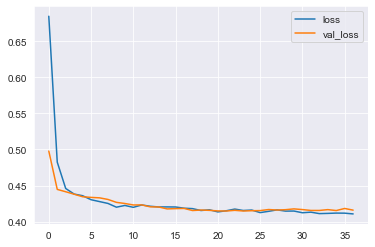

In [800]:
pd.DataFrame(model.history.history)[['loss','val_loss']].plot()

In [801]:
test_loss, test_acc = model.evaluate(X_test, y_test)


90/90 [==============================] - 0s 1ms/step - loss: 0.4159 - accuracy: 0.8365


In [715]:
from sklearn.metrics import confusion_matrix, classification_report
from pickle import dump, load

In [803]:
accuracy_score(y_pred, y_test)

0.8364648573416841

In [804]:
confusion_matrix(y_pred, y_test)

array([[2402,  469],
       [   1,    2]], dtype=int64)

In [805]:
predictions = model.predict(X_test)
classes_x = predictions.argmax(axis=1)
print(classes_x)

# 

90/90 [==============================] - 0s 2ms/step
[0 0 0 ... 0 0 0]


In [806]:
print(confusion_matrix(y_test,classes_x))
print(classification_report(y_test,classes_x))

[[2403    0]
 [ 471    0]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2403
           1       0.00      0.00      0.00       471

    accuracy                           0.84      2874
   macro avg       0.42      0.50      0.46      2874
weighted avg       0.70      0.84      0.76      2874



c:\Users\harceroj\Miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\harceroj\Miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\harceroj\Miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Tuning

In [807]:
import keras_tuner as kt
def build_model(hp):
 model = Sequential()

 model.add(Dense(units = hp.Int('units', min_value = 32, max_value = 1024, step = 16),
                                 activation ='relu',
                                 input_shape = (X_train.shape[1],)))
 model.add(BatchNormalization())
 model.add(Dropout(hp.Float('rate', min_value = 0.1, max_value = 0.4, step = 0.1), seed = 123))

 model.add(Dense(units = hp.Int("units", min_value = 32, max_value = 128, step = 16),
                                 activation = "relu"))
 model.add(BatchNormalization())
 model.add(Dropout(hp.Float("rate",min_value = 0.1, max_value = 0.4, step = 0.1), seed = 123))

 model.add(Dense(units = hp.Int("units", min_value = 16, max_value = 64, step = 16),
                                 activation = "relu"))
 model.add(BatchNormalization())
 model.add(Dropout(hp.Float("rate",min_value = 0.1, max_value = 0.4, step = 0.1), seed = 123))
    
 model.add(Dense(units = 1, activation = "sigmoid"))

 learning_rate = hp.Float("learning_rate", min_value = 0.001, max_value = 0.1, step = 0.01)
 
 model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate),
               loss = "binary_crossentropy",
               metrics = ["accuracy"])
 
 return model

In [808]:
build_model(kt.HyperParameters())

In [809]:
rtuner = kt.RandomSearch(hypermodel = build_model,
 objective='val_accuracy',
 max_trials=3,
 executions_per_trial=2,
 overwrite=True)

In [810]:
rtuner.search(X_train, y_train, epochs=5, validation_data=(X_test,y_test))

Trial 3 Complete [00h 00m 27s]
val_accuracy: 0.8385525643825531

Best val_accuracy So Far: 0.8394224047660828
Total elapsed time: 00h 02m 04s
INFO:tensorflow:Oracle triggered exit


In [811]:
models = rtuner.get_best_models(num_models=2)
models[1].summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1152      
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

In [813]:
test_loss, test_acc = models[1].evaluate(X_test, y_test)

90/90 [==============================] - 0s 1ms/step - loss: 0.4608 - accuracy: 0.8406
